In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# plotting setup
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

# Data

In [6]:
import pandas as pd

concrete = pd.read_csv('data/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
input_shape = [concrete.shape[1] - 1]

# Defining Model with Hidden Layers

3 hidden layers, each having 512 uits and ReLU activaition layer. Output layer will not have activation

In [8]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=input_shape),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1), # output layer, no activation function
])

Sometimes we may want to put some other layer between the Dense layer and its activation function. (We'll see an example of this in Lesson 5 with batch normalization.) In this case, we can define the activation in its own Activation layer.

In [12]:
input_shape = [8]

model2 = keras.Sequential([
    layers.Dense(units=32, input_shape=input_shape),
    layers.Activation('relu'),
    layers.Dense(units=32), 
    layers.Activation('relu'),
    layers.Dense(units=1),
])

# Other Activation Layers

There is a whole family of variants of the 'relu' activation -- 'elu', 'selu', and 'swish', among others -- all of which we can use in Keras. Sometimes one activation will perform better than another on a given task, so we could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

In [13]:
def plot(activation_layer):
    x = tf.linspace(-3.0, 3.0, 100)
    y = activation_layer(x) # once created, a layer is callable just like a function
    plt.figure(dpi=100)
    plt.plot(x, y)
    plt.xlim(-3, 3)
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.show()

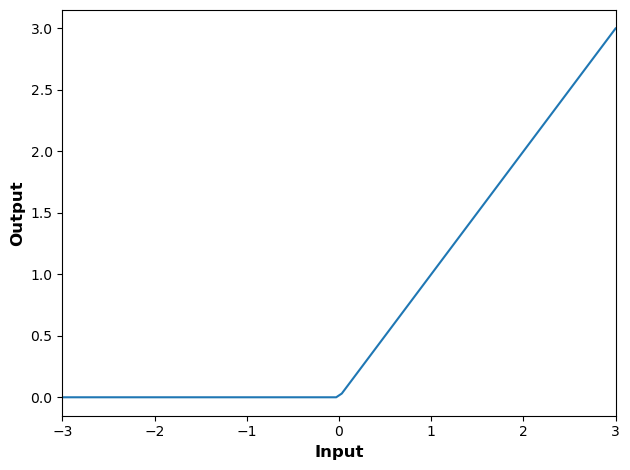

In [14]:
activation_layer = layers.Activation('relu')
plot(activation_layer)

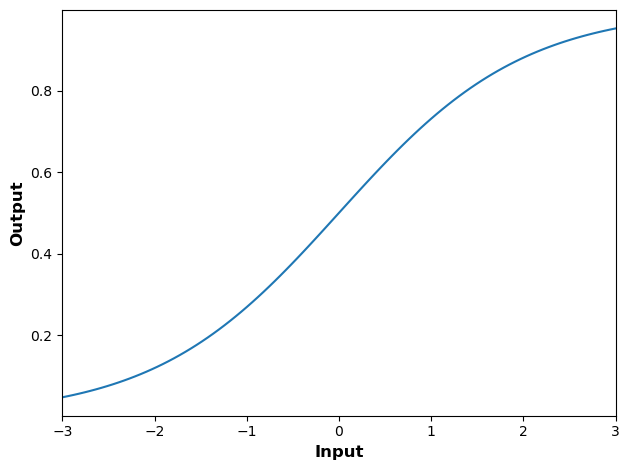

In [15]:
activation_layer = layers.Activation('sigmoid')
plot(activation_layer)

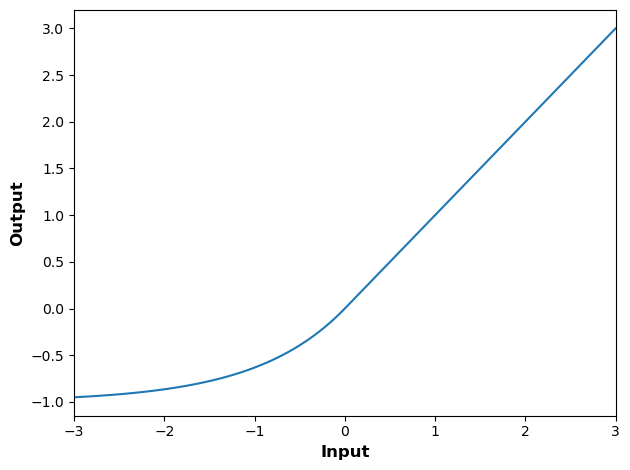

In [16]:
activation_layer = layers.Activation('elu')
plot(activation_layer)

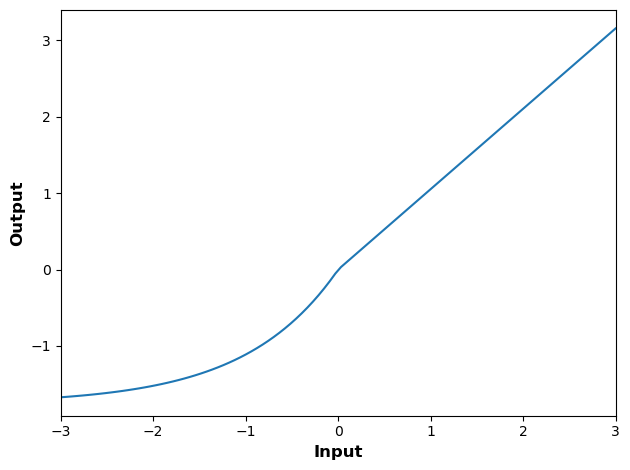

In [17]:
activation_layer = layers.Activation('selu')
plot(activation_layer)

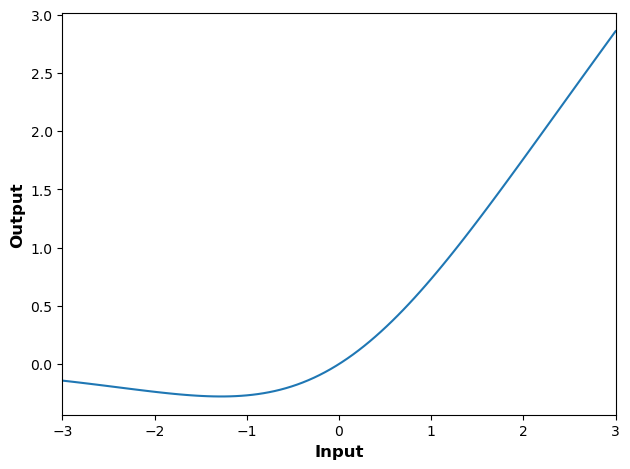

In [18]:
activation_layer = layers.Activation('swish')
plot(activation_layer)